# 전세계 음주 데이터 분석하기

## 1 데이터 기초 정보 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* country                       : 국가 정보 
* beer_servings                 : bear 소비량 
* spirit_servings               : spirit 소비량 
* wine_servings                 : wine 소비량 
* total_litres_of_pure_alcohol  : 총 알코올 소비량 
* continent                     : 국가의 대륙 정보 

#### 데이터셋 기초 정보 확인 

In [2]:
file_path = '../data/drinks.csv'
drinks = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
drinks.info()
drinks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


#### 통계 정보 확인 

In [3]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## 2. 탐색과 시각화 

#### 두 피처 간의 상관 계수 구하기 
- 공분산 : 2개의 확률 변수에 대한 상관 정도로 2개의 변수 중 하나의 값이 상승하는 경향을 보일때 다른 값도 상승하는 경향을 수치로 나타낸 것.
- 상관 계수 : 두 변수는 단위 크기에 영향을 받을 수 있기 때문에 -1~1 사이의 값으로 변환 필요
    - 상관 계수가 1에 가까우면 양의 상관 관계, -1에 가까우면 음의 상고나 관계

In [4]:
corr = drinks[['beer_servings', 'wine_servings']].corr(method='pearson')  # pearson : 상관 계수를 구하는 방법 
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


#### 여러 피처의 상관 관계 분석하기 

In [5]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


#### 행렬 히트맵 시각화 

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

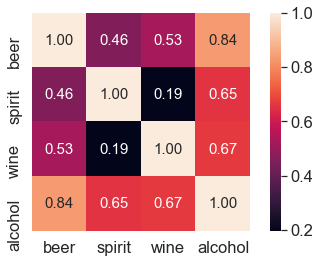

In [7]:
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

#### 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.

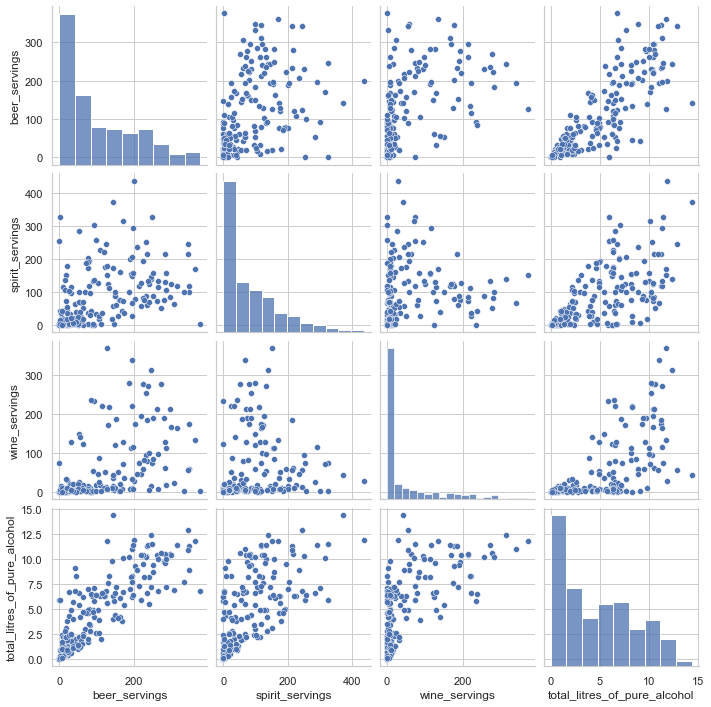

In [8]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

## 3 데이터 전처리 

#### 결측 데이터 전처리 

* 결측치 존재 여부 확인하기

In [9]:
print(drinks.isnull().sum())   # null 갯수 체크하기 
print(drinks.dtypes)           # 데이터 타입 확인하기 
drinks.info()   # 결측지 존재 여부 확인하기 

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   c

* 결측치 값을 임의의 값으로 채워 넣기 

In [10]:
drinks["continent"] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


#### 파이차트로 비율 시각화 하기 

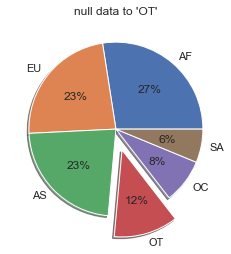

In [11]:
labels = drinks['continent'].value_counts().index.tolist(); # 인덱스 리스트로 생성 
fracs1 = drinks['continent'].value_counts().values.tolist(); # 값 리스트 생성
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

#### 대륙별 spirit_servings의 통계적 정보 
* 대륙별 평균, 최소, 최대, 합계 구하기 
    * agg : apply() 함수와 유사
    * 함수 파라미터를 병렬로 설정하여 구룹에 대한 여러가지 연산 결과를 동시에 얻을 수 있는 함수 

In [12]:
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


#### 전체 평균보다 많은 알콜을 섭취하는 대륙 찾기 

In [13]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()  # 전체의 평균 
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
continent_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

#### 평균 beer_servings가 가장 높은 대륙 찾기 

In [14]:
total_bs_mean = drinks.beer_servings.mean()
continent_bs_mean = drinks.groupby('continent')['beer_servings'].mean()
hi_bs_mean = continent_bs_mean.idxmax()   # 가장 큰 인덱스 값 출력 
hi_bs_mean

'EU'

#### 막대 그래프로 시각화 
* 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화

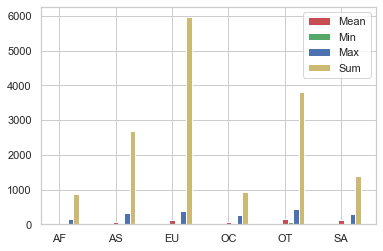

In [15]:
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

* 대륙별 total_litres_of_pure_alcohol을 시각화

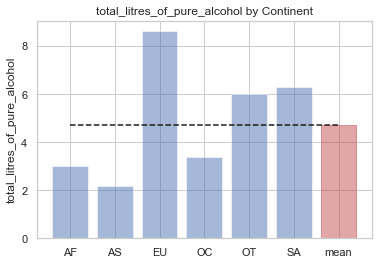

In [16]:
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')  # 붉은 색으로 설정 

# 중간에 검은색 라인 긋기 
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)  # x 축 값 (x의 위치에 대륙 정보)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

* 대륙별 beer_servings를 시각화 

continent
AF    3258
AS    1630
EU    8720
OC    1435
OT    3345
SA    2101
Name: beer_servings, dtype: int64
['AF', 'AS', 'EU', 'OC', 'OT', 'SA']
y_pos : [0 1 2 3 4 5]
[3258, 1630, 8720, 1435, 3345, 2101]


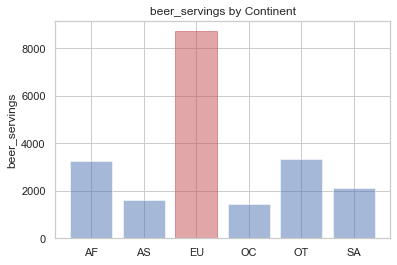

In [17]:
beer_group = drinks.groupby('continent')['beer_servings'].sum() # 대륙별 beer_servings 합계
print(beer_group)
continents = beer_group.index.tolist()  # 대륙별 그룹 인덱스 
print(continents)
y_pos = np.arange(len(continents))
print('y_pos :',y_pos)
alcohol = beer_group.tolist()  # beer_group에 대한 리스트 
print(alcohol)

bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index('EU')].set_color('r')  # EU 항목을 붉은 색으로 설정

plt.xticks(y_pos, continents) # x 항목 설정 
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
 
plt.show()

In [18]:
means = result['mean'].tolist()
print(means)
mins = result['min'].tolist()
print(mins)
maxs = result['max'].tolist()
print(maxs)
sums = result['sum'].tolist()
print(sums)

[16.339622641509433, 60.84090909090909, 132.55555555555554, 58.4375, 165.7391304347826, 114.75]
[0, 0, 0, 0, 68, 25]
[152, 326, 373, 254, 438, 302]
[866, 2677, 5965, 935, 3812, 1377]


* 아프리카와 유럽 간의 맥주 소비량 차이 검정하기

In [19]:
africa = drinks.loc[drinks['continent'] == 'AF'] # 아프리카 정보 추출 
africa
europe = drinks.loc[drinks['continent'] == 'EU'] # 유럽 정보 추출 
europe

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


* 실행 결과에 등장하는 t-statistic은 t-test의 검정 통계량을 의미하는 것으로, 함께 출력되는 p-value와 연관 지어 해석해야 함.
* p-value는 가설이 얼마나 믿을만한 것인지를 나타내는 지표로, 데이터를 새로 샘플링했을 때 귀무 가설이 맞다는 전제 하에 현재 나온 통계값 이상이 나올 확률이라 정의함
* p-value가 너무 낮으면 귀무 가설이 일어날 확률이 너무 낮기 때문에 귀무 가설을 기각하게 됨.
    * 보통 그 기준은 0.05나 0.01을 기준으로 하며, 이를 p-value(유의확률)이라 함
* 귀무 가설이란 처음부터 버릴 것을 예상하는 가설이며, 가설이 맞지 않다는 것을 중명하기 위해 수립하는 가설
* 반대되는 것을 대립 가설이라함(귀무 가설이 거짓인 경우에 대안적으로 참이 되는 가설을 의미함)

In [20]:
from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)

tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


#### 대한민국은 얼마나 술을 독하게 마시는 나라인가? 

In [21]:
# total_servings 피처를 생성합니다.
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']
print(drinks['total_servings'])

0        0
1      275
2       39
3      695
4      319
      ... 
188    436
189    114
190      6
191     55
192     86
Name: total_servings, Length: 193, dtype: int64


In [22]:
# 술 소비량 대비 알콜 비율 피처를 생성합니다.
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)
# 순위 정보를 생성합니다.
country_with_rank = drinks[['country', 'alcohol_rate']]  # 국가와 알콜률 
print(country_with_rank)
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)   # 상위 5개 출력 

         country  alcohol_rate
0    Afghanistan      0.000000
1        Albania      0.017818
2        Algeria      0.017949
3        Andorra      0.017842
4         Angola      0.018495
..           ...           ...
188    Venezuela      0.017661
189      Vietnam      0.017544
190        Yemen      0.016667
191       Zambia      0.045455
192     Zimbabwe      0.054651

[193 rows x 2 columns]


,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


#### 국가별 순위 정보를 시각화 하기 

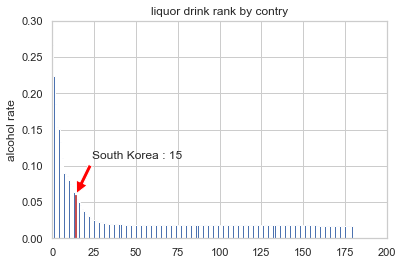

In [23]:
country_list = country_with_rank.country.tolist()  # 국가명 리스트 
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()  # 순위 정보 

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()